<h1>Introduction</h1>

The adult dataset is from the 1994 Census database. Details of this dataset can be found at UCI Machine Learning Repository. My main aim is to create a simple GUI, so that users can input their own data and get a prediction of whether their income will exceed $50,000.
The objectives that I will follow to complete my main aim are set out below :
+ Clean the data - Replace or delete missing data, 
+ Explore the data - delete any unnecessary fields and reduce the variance of individual features 
+ Normalise the data - convert the needed data for modelling 
+ Explore the machine learning algorithms 
+ Optimise the selected machine learning algorithm 
+ Create the GUI 

<h1>Cleaning the Data</h1>

To examine the data and prepare it for fitting in a chosen machine learning algorithm, Pandas was selected.    

In [3]:
import pandas as pd

The file was opened using Pandas and a quick assesmment of the dataframe was performed. 

In [4]:
df = pd.read_csv(r"C:\Users\NJGaj\port\Scikit-Learn\K Nearest Neighbors\Salary\Salary.txt",index_col=False,
                names = [ "age" ,"workclass", "fnlwgt","education","education-num","marital-status","occupation",
                         "relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"
                        ,"label"])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
label             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


From the information collected on the dataframe, we know that there are 14 features that could be used for predicting the label column. However, from the original 15 columns, 2 columns are not self-explanatory. 
Both fnlwgt and education-num does not have an obvious correlation to the salary. After further examining the information on the dataset, fnlwgt is a weight on the sample and education-num is a repetitive column repeating the information in the education columns.
It was decided that both columns would be dropped from the dataframe.

In [5]:
df = df.drop(["fnlwgt","education-num"],1)

From the information file on the dataset, we know that all missing data was represented as  "?". 

 All missing data was changed to the numpy form "NaN", which meant that the numpy library had to be imported.

In [6]:
import numpy as np
df = df.replace(" ?", np.NaN)

A report on the missing data was then produced

In [7]:
print(df.isnull().sum())

age                  0
workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
label                0
dtype: int64


More information was gathered to find out how much data would be lost if we deleted all the missing data.

In [8]:
new_df = df.dropna()
print("################")
print("Total records that would be lost if deleted : ")
print(df.shape[0]- new_df.shape[0])
del new_df

################
Total records that would be lost if deleted : 
2399


Although we would lose only 2399 records out of 32561, further exploration of the data could result in a reduction in the loss of data.

<h1> Exploring the data </h1>

From the 3 columns, where we would be losing the data, a graph was created showing the distribution of the data.Matplotlib was chosen to plot the graph.

In [9]:
import matplotlib.pyplot as plt
native_df = df["native-country"]
native_df = pd.DataFrame(native_df.value_counts())
labels = list(native_df.index)
fig , ax = plt.subplots(figsize=(10,10))
ax.pie(native_df["native-country"], shadow=True, startangle=90)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("% of Native Countries")

print("United-States total percentage :{} %".format((native_df.iloc[0,0] / sum(native_df["native-country"]))*100))
del native_df

United-States total percentage :91.218963037088 %


From the figure, we can see that 1 variance of this feature has over 91% of the data. A decision was made to change all missing data from the Native Country column to equal "United States". 

Additional, the majority of the other variances had such as low number of records that a decision was made to try and combine the countries together in a way that could add to the model. The decision was to use the information from the website :

https://www.nationsonline.org/oneworld/GNI_PPP_of_countries.htm

to split the countries into first, second and third world countries. The belief is that an immigrant from a first world country might have more financial or educational support to aid them. 

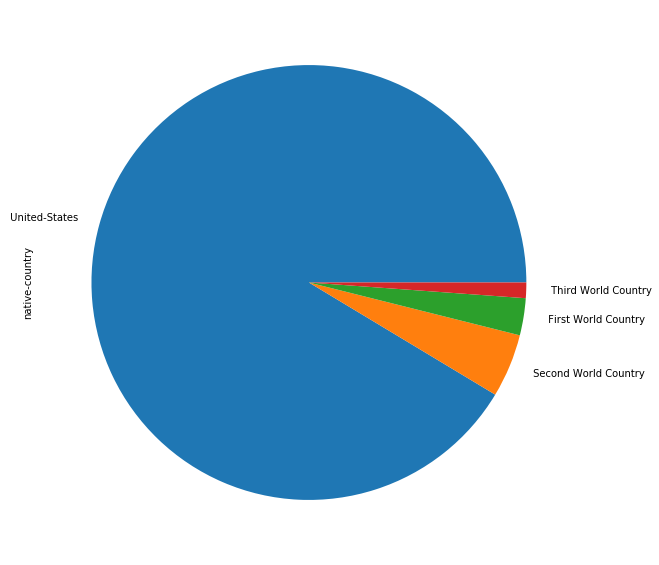

In [10]:
df["native-country"] = df["native-country"].replace(np.NaN , " United-States")
third_world = [" Honduras", " Vietnam"," Cambodia"," Laos"," Haiti",
               " Yugoslavia"," India"," Guatemala", " Nicaragua"]
second_world = [" Trinadad&Tobago"," Poland" ," Mexico" , " Thailand"," Iran",
                " Columbia", " Peru", " Philippines" ," China"," Ecuador" ,
                " Cuba"," El-Salvador"," Jamaica"," South"]
first_world = [" Holand-Netherlands"," Scotland"," Ireland"," Hong"," Beligum" ," Japan"," Italy"," England"," Germany"," Canada"," France"," Taiwan"," Greece",
               " Portugal" , " Hungary"," Outlying-US(Guam-USVI-etc)",
               " Puerto-Rico", " Dominican-Republic"]

for i in first_world:
    df["native-country"] = df["native-country"].replace(i," First World Country")

for i in second_world:
    df["native-country"] = df["native-country"].replace(i," Second World Country")

for i in third_world:
    df["native-country"] = df["native-country"].replace(i," Third World Country")
    
df["native-country"].value_counts().plot(kind="pie", figsize=(10,10))

The next step was to look at the working class data and how the data is distributed.

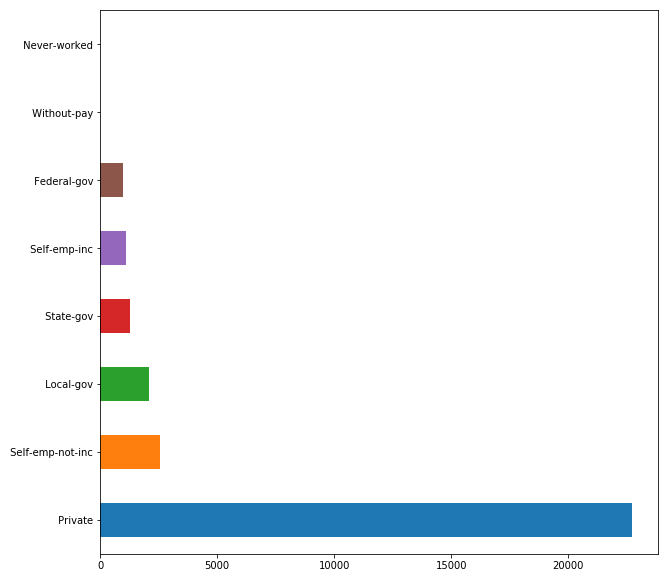

In [11]:
df["workclass"].value_counts().plot(kind="barh",figsize=(10,10))

Again, the majority of the data is Privately employed. With the data being skewed  to the Private sector,the missing data for the working class column was placed into the Private Column. 

In addition to editing the missing data, a decision was made to combine fields that had a high correlation. The people who never work and the people who are without  work were placed in the same category. 

However the Government job categories remained as the mean salary for the different levels are significantly different. 

-Federal government - $70,000 <br> 

-State government - $53,180 <br>

-Local goverment - $47,230 <br>
(Information retrieved at https://work.chron.com/average-salary-government-employees-7863.html)

For the self employed columns, although no additional data was found showing a difference between incorporated self employers and unincorporated self-employees. It was thought that a person would incorporate their company when it grows to a significant size and so there could be a significant difference between the 2 categories. This resulted in the 2 categories being left as they were.

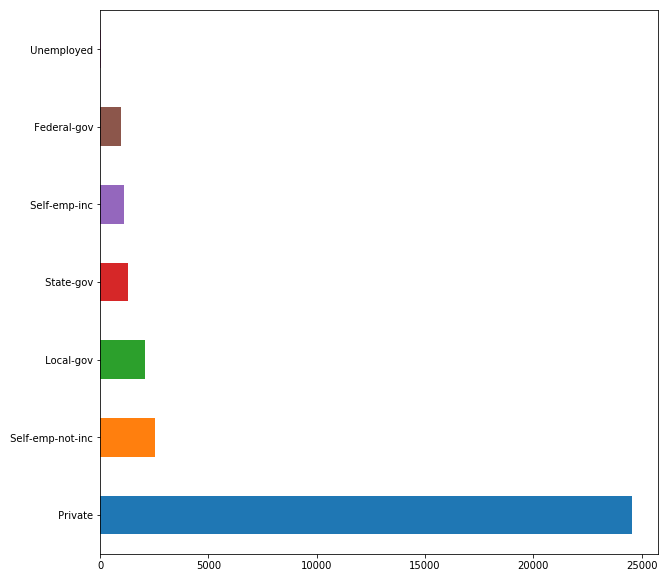

In [12]:
df["workclass"] = df["workclass"].replace(np.NaN," Private")
replacing = [" Never-worked"," Without-pay"]
for i in replacing : 
    df["workclass"] = df["workclass"].replace(i," Unemployed")
del replacing
df["workclass"].value_counts().plot(kind="barh",figsize=(10,10))

An examination of the last column, Occupation, occurred.

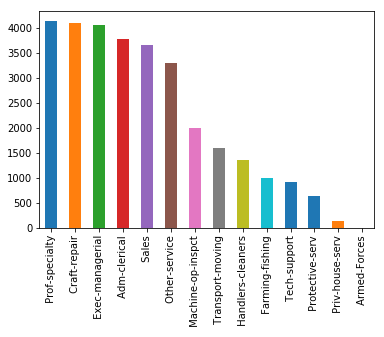

In [13]:
occ_df = df["occupation"].value_counts()
occ_df.plot(kind="bar")
del occ_df

The spread of the data was much more even. 3 options were considered for the missing data. The first option was to create a model that used the other features to predict which occupation the record belonged to. The second option was to delete the data. The last option was to convert the missing data to an intentional out-of-range value. This would allow some of the prediction models to ignore that piece of data. 

A examination on how many records would be lost occurred.

In [14]:
print(df["occupation"].unique())
df.isnull().sum()

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' nan
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


age                  0
workclass            0
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
label                0
dtype: int64

The results of that examination showed that 1843 would still be lost. After creating a model using KNNclasifer, the model came to only a 33% chance of guessing the correct label. Additionally, due to the size of the remaining sample,it was deemed acceptable to lose this number of records.

In [15]:
df = df.dropna()

Once all the missing data was either replaced or deleted. The other columns were examined to see if the varience in each columns could be reduced.

To get a better idea if certain data categories could be combined an examine on the bias of dataframe was conducted. 

In [16]:
education_df = df[["label","education"]]
ed_below_50 = education_df[education_df["label"] == " <=50K" ]
ed_above_50 = education_df[education_df["label"] == " >50K" ]
print("Number of records above 50000 :")
print(ed_above_50.shape[0])
print("################################")
print("Number of records below 50000 :")
print(ed_below_50.shape[0])
print("################################")

Number of records above 50000 :
7650
################################
Number of records below 50000 :
23068
################################


Using this information, a graph was created from the education column that showed the distribution of the data in each of the eductional categories.

In [17]:
ed_above_50 = ed_above_50.groupby("education").agg(["count"])
ed_below_50 = ed_below_50.groupby("education").agg(["count"])
ed_above_50.loc[" Preschool"] = 0
ed_above_50 = ed_above_50.sort_index(ascending = False)
ed_below_50 = ed_below_50.sort_index(ascending = False)
labels = list(ed_above_50.index)

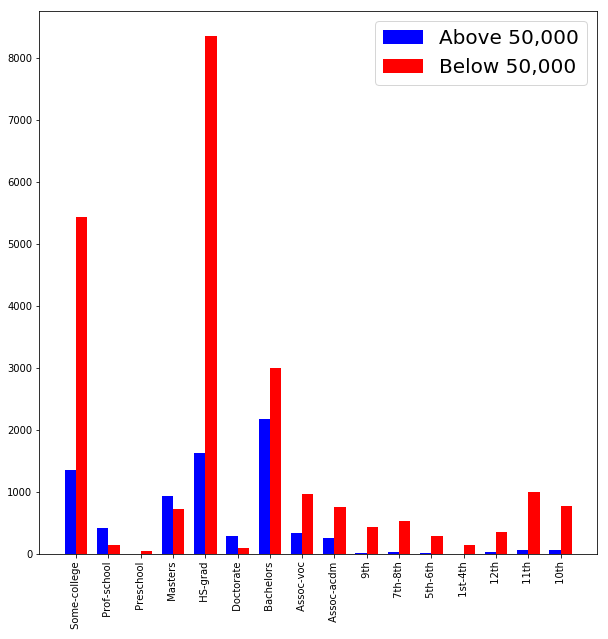

In [18]:
index = np.arange(1,ed_above_50.shape[0]+1)
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10,10))
rect1 = ax.bar(index - bar_width / 2 ,ed_above_50[("label","count")],bar_width,color="b", label="Above 50,000")
rect2 = ax.bar(index + bar_width /2 , ed_below_50[("label","count")], bar_width,color="r", label="Below 50,000")
ax.legend(fontsize = "20")
ax.set_xticks(index)
ax.set_xticklabels(labels)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

A decision was made to combine all categories that were below the High School graduate. As the belief was that anyone who dropped out of highschool wouldn't be using their acdamic ability to aid them in their career.  

In [19]:
replacing = [" 11th"," 10th"," 7th-8th"," 9th"," 12th"," 5th-6th"," 1st-4th"," Preschool"]
for i in replacing:
    df["education"] = df["education"].replace(i," Dropout")
print(df["education"].unique())

[' Bachelors' ' HS-grad' ' Dropout' ' Masters' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' Doctorate' ' Prof-school']


This step was then repeated for both the "Martial Status" and "Relationship" columns.An examination of these columns took place to see if there was any redundancy between the two columns. 

In [20]:
print(df["marital-status"].value_counts())
print(df["relationship"].value_counts())

 Married-civ-spouse       14339
 Never-married             9912
 Divorced                  4258
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: marital-status, dtype: int64
 Husband           12704
 Not-in-family      7865
 Own-child          4525
 Unmarried          3271
 Wife               1435
 Other-relative      918
Name: relationship, dtype: int64


Even though there is some cross over between the two columns, it was decided to keep both. However, for the relationship column, the "Husband" and "Wife" categories were combined into 1 named married, and the "Not - in - Family" was added to the unmarried categry.  

In [21]:
married_replacing = [" Husband", " Wife"]
for i in married_replacing:
    df["relationship"]= df["relationship"].replace(i," Married")
    
df["relationship"]= df["relationship"].replace(" Not-in-family"," Unmarried")
print(df["relationship"].value_counts())

 Married           14139
 Unmarried         11136
 Own-child          4525
 Other-relative      918
Name: relationship, dtype: int64


This process was repeated for the "Martial Status" column as the separated records were combines with the divorced data and the "Married Civ Spouse" and "Married AF Spouse" were combined into the Married data.

In [22]:
df["marital-status"]= df["marital-status"].replace(" Separated"," Divorced")
df["marital-status"]= df["marital-status"].replace(" Married-civ-spouse"," Married")
df["marital-status"]= df["marital-status"].replace(" Married-AF-spouse"," Married")
print(df["marital-status"].value_counts())

 Married                  14360
 Never-married             9912
 Divorced                  5217
 Widowed                    840
 Married-spouse-absent      389
Name: marital-status, dtype: int64


<h1> Normalising the data </h1>

The data has been cleaned and combined to make it more effective in the modeling process.However, currently there are still a number of columns that have an unsuitable datatype for some of the machine learning algorithms that I will be using.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 13 columns):
age               30718 non-null int64
workclass         30718 non-null object
education         30718 non-null object
marital-status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null object
sex               30718 non-null object
capital-gain      30718 non-null int64
capital-loss      30718 non-null int64
hours-per-week    30718 non-null int64
native-country    30718 non-null object
label             30718 non-null object
dtypes: int64(4), object(9)
memory usage: 3.3+ MB


I will be converting all the object datatypes to a numerical type. The options that I have for this are using the Labelencoder and OneHotEncoder.

Due to the non-ordinal relations between the data categories in each column. I have chosen to use pandas.get_dummies on the object datatypes, "workclass","education","marital-status","occupation","relationship","race","sex","native-country" were converted to a numeric value. 


In [24]:
features = df[["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]]
new_features = pd.get_dummies(features)

These features are then added to the original dataframe, and the original columns deleted.

In [25]:
df.reset_index(inplace= True)
new_features.reset_index(inplace= True)
df = pd.merge(df,new_features,on="index",how="inner")
df.head(2)

,index,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ First World Country,native-country_ Second World Country,native-country_ Third World Country,native-country_ United-States
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,...,0,0,0,1,0,1,0,0,0,1
1,1,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Married,White,Male,0,...,0,0,0,1,0,1,0,0,0,1


In [26]:
df = df.drop(["index","workclass","education","marital-status","relationship","race","sex",
               "native-country","occupation"],1)
df.head(2)

,age,capital-gain,capital-loss,hours-per-week,label,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ First World Country,native-country_ Second World Country,native-country_ Third World Country,native-country_ United-States
0,39,2174,0,40,<=50K,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,50,0,0,13,<=50K,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


Continuing with the necessary conversion of the data, the label column was updated so that:

0 = Below $50,000

1 = Above $50,000

In [27]:
df["label"] = df["label"].apply(lambda x : 0 if x ==" <=50K" else 1)
label_df = df["label"]
features = df.drop("label",1)
features.head(2)
print(features.columns)

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week',
       'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Unemployed',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ Dropout', 'education_ HS-grad',
       'education_ Masters', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married', 'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Widowed',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Pr

The features then had to be normalised as the differences between some of the values were so great that it could affect the accuracy of the models. 

The MinMaxScaler was used to transforms the data.


In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib

scaler = MinMaxScaler()
scaler.fit(features)
joblib.dump(scaler, 'MinMaxScaler.pkl') 
scaled_df = scaler.transform(features)

C:\Users\NJGaj\Anaconda3\envs\graphs\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<h1> Exploring the machine learning algorithms</h1>

With the transformation of the data complete, a selection of algorithms were chosen to explore the best method to predict the salary classification. Below are the selected algorithms : 

1)KNeighborsClassifier

2) Naive_bayes

3)Linear Regression

4)Random Forest

5)Extra Trees 

6) Support Vector Machine

7) Neural Network

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


The data was then divided into test and train datasets. We have 2 ways to divide our data, with the train_test_split option and cross_val_score. We will initially see the results from the test_train_split.

In [50]:
X_train, X_test,y_train,y_test = train_test_split(scaled_df,label_df)

The classifiers are then set to their default settings and each classifier is trained and tested with the data.


In [51]:
classifiers = [
    KNeighborsClassifier(100),
    GaussianNB(),
    ExtraTreesClassifier(100),
    svm.SVC(gamma='scale'),
    RandomForestClassifier(100),
    MLPClassifier(max_iter=200)
    
    ]

alo = []
min_max = []
standard_list = []
confusion_matrix_list = []
for clf in classifiers:
    clf.fit(X_train,y_train)
    name = clf.__class__.__name__
    alo.append(name)
    prediction = clf.predict(X_test)
    acc = accuracy_score(y_test, prediction)
    min_max.append(acc)
    matrix = confusion_matrix(y_test, prediction)
    confusion_matrix_list.append(matrix)
    

C:\Users\NJGaj\Anaconda3\envs\graphs\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


This information is placed in a chart so we can compare the accuracy of each classifier. 

[0.8279947916666667, 0.6401041666666667, 0.8229166666666666, 0.8325520833333333, 0.841796875, 0.8440104166666667]
0.8440104166666667


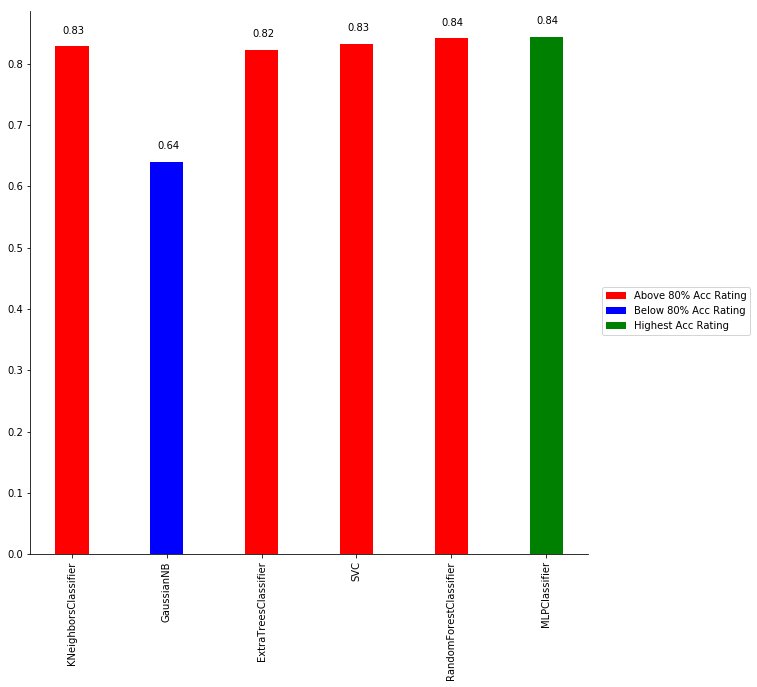

In [52]:
print(min_max)
max_val = max(min_max)
print(max_val)
labels = list(alo)
index = np.arange(1,len(alo)+1)    
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10,10))
red_counter = False
blue_counter = False
for i in range(0,len(index)):
    if max_val == min_max[i]:
        colour = "Green"
        label = "Highest Acc Rating"
        ax.bar(index[i] ,min_max[i],bar_width,color=colour , label = label)
    elif  min_max[i] > 0.8:
        colour = "r"
        label = "Above 80% Acc Rating"
        if red_counter == False:
            ax.bar(index[i] ,min_max[i],bar_width,color=colour , label = label)
            red_counter = True
        else: 
            ax.bar(index[i] ,min_max[i],bar_width,color=colour)
                
    else:
        label ="Below 80% Acc Rating"
        colour = "b"
        if blue_counter == False:
            ax.bar(index[i] ,min_max[i],bar_width,color=colour , label = label)
            blue_counter =True
        else:
            ax.bar(index[i] ,min_max[i],bar_width,color=colour)
            
        
ax.legend(bbox_to_anchor=(1.3, 0.5))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(range(1,len(labels)+1), labels)
for index,info in enumerate(ax.get_xticklabels()):
    info.set_rotation(90)
    ax.text(index+0.90,min_max[index]+0.02,"{:.2f}".format(min_max[index]))

As we can see, apart from Naive Bayes, all the other machine learning algorithms are above 80% with the Random Forest and the Neural Network Classifier slightly edging it at >84 % accuracy. 
With so many algorithms having a similar accuracy rating, further investigation will be undertaken by looking at the confusion matrix. This will establish where the errors occurred.


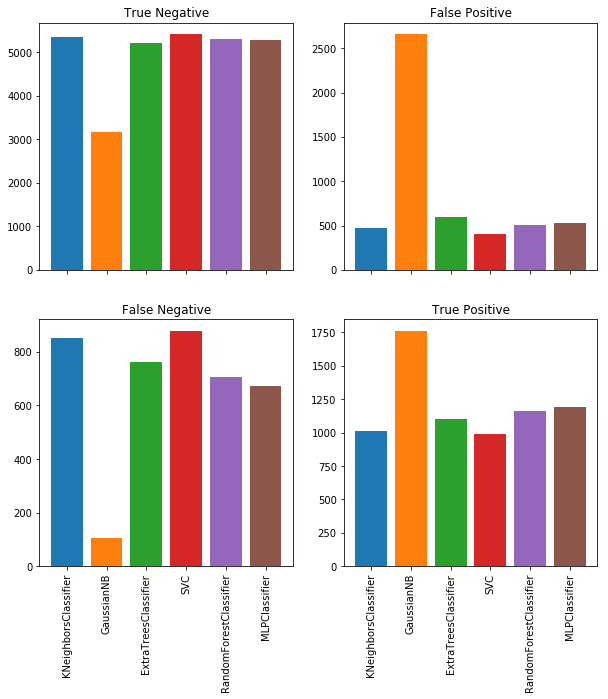

In [53]:
from matplotlib.gridspec import GridSpec
confusion_matrix_list
fig = plt.figure(figsize=(10,10))
gs = GridSpec(2,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])

ax1_info =[]
ax2_info =[]
ax3_info =[]
ax4_info =[]

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

for index,clf in enumerate(confusion_matrix_list):
    for index1,info_list in enumerate(clf):
        counter = 1
        for index2,info in enumerate(info_list):
            if index1 == 0:
                if index2 == 0 :
                    ax1_info.append(info)
                elif index2 == 1 :
                    ax2_info.append(info)
            elif index1 == 1:
                if index2 == 0 :
                    ax3_info.append(info)
                elif index2 == 1 :
                    ax4_info.append(info)
                
for index in range(1,len(ax1_info)+1):
    ax1.bar(index , ax1_info[index-1])
    ax2.bar(index , ax2_info[index-1])  
    ax3.bar(index , ax3_info[index-1])  
    ax4.bar(index , ax4_info[index-1])  
       
ax1.set_title("True Negative")
ax2.set_title("False Positive")
ax3.set_title("False Negative")
ax4.set_title("True Positive")

labels.insert(0,"None")
ax3.set_xticklabels(labels) 
ax4.set_xticklabels(labels)

for labelax3,labelax4 in zip(ax3.get_xticklabels(),ax4.get_xticklabels()):
    labelax3.set_rotation(90)
    labelax4.set_rotation(90)
        

As we can see, the Extra Tree Classifier had more False Positives and less True Positives than the other classifier. In addition, Support Vector Classifier and the KNN Classifier had a lower accuracy with the Positive labelling. 
With the bias of the dataset so overly skewed to the negative values, being able to accurately predict the positive values is a factor that I deem higher than being able to predict a negative value. 
Therefore, I will do further analysis on both the Random Forest and Neural Network to find out the most suitable model and whether I can improve the accuracy by optimising the classifiers.
To get a more detailed assessment of the models, I will use the cross validated data to assess the models.


In [54]:
clf = [
    RandomForestClassifier(100),
    MLPClassifier(max_iter=200)
]


alo1 = []
acc_score = []
for model in clf : 
    cross_val = np.mean(cross_val_score(model, features, label_df, cv=10))
    name = model.__class__.__name__
    alo1.append(name)
    acc_score.append(cross_val)
    
    


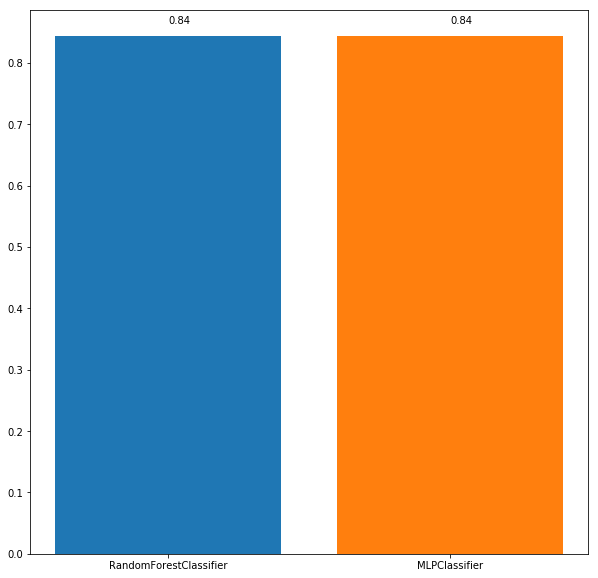

In [55]:

fig, ax = plt.subplots(figsize=(10,10))
for i in range(1,len(acc_score)+1):
    ax.bar(alo1[i-1], acc_score[i-1])

for index in range(1,len(alo1)+1):
    ax.text(index-1 , acc_score[index-1]+0.02, "{:.2f}".format(acc_score[index-1]))
    


Both classifiers do equally well with the cross validated data. 

<h1>Optimising the selected machine learning algorithm </h1>

To optimise the machine learning algorithm, a dictionary was created with multiple parameters for the algorithm.

In [56]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



The RandomizedSearchCV method was used to use cross-validated data to search over the parameter settings in the dictionary for the most effective parameters for the machine learning algorithm . 

In [57]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(features, label_df)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 107.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

The results of the search allows us to display the more effective settings for our machine algorithm. 

In [58]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': False}

These parameters can then be applied to the machine learning algorithm.

In [59]:
clf = RandomForestClassifier(n_estimators = 2000,
 min_samples_split = 2,
 min_samples_leaf = 4,
 max_features ="auto",
 max_depth = 30,
 bootstrap =False) 

forest_cross_val = np.mean(cross_val_score(clf, features, label_df, cv=10))

                        

When the new algorithm is then tested on the data. We can see that accuracy of the algorithm increase by 0.02 %.


In [60]:
print("The New acc Rating for Random Forest Model is :  ")
print("{:.2f}".format(forest_cross_val))

The New acc Rating for Random Forest Model is :  
0.86


<h1> Creating the GUI</h1>

To use the model in a GUI, the model needs to be saved. To do this, we import the pickle library and save the model that we have just created. We can then load it up in a new script to be used in our GUI program.

In [80]:
import pickle

with open('rf_classifier_salary.pkl', 'wb') as fid:
    pickle.dump(rf_random, fid) 
    